In [43]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats 
import scipy
from scipy.special import factorial
import math
from cleanData import getCleanTripData, getCleanFareData, getTripData, getFareData
from identifySuburbs import TaxiZone, Point, process_zones, haversine_distance, manhattan_distance

In [44]:
#loc_hash_3_trip_4_2013.csv
trip = getTripData('./data/trip_data_4.csv')
trip = getCleanTripData(trip)
fare = getFareData('./data/trip_fare_4.csv')
fare = getCleanFareData(fare)

Median : 478.0
Mean : 454.72553937269595
33094
8821


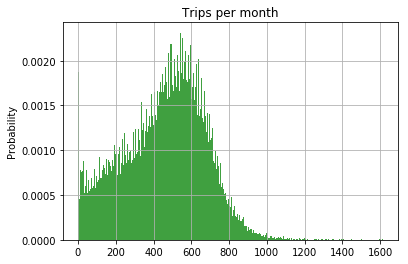

In [45]:
n = fare['hack_license'].value_counts(sort=True)
print("Median : {}".format(np.median(n)))
print("Mean : {}".format(np.mean(n)))
print(len(n))
print(len(n[n > 600]))
plt.hist(n, bins=200, normed=True, facecolor='green', alpha=0.75)
plt.ylabel('Probability')
plt.title('Trips per month')
plt.grid(True)

In [50]:
#Most of the trips

ppl_list = n.index.tolist()#Sorted by ammount of trips they did
ppl_earnings_a_month = []
ppl_trips_a_month = n[:200]
for i in range(0, 200):
    lic = ppl_list[i]
    
    ppl_earnings_a_month.append(np.array(fare[fare.hack_license == lic].fare_amount).sum())
print(ppl_earnings_a_month)

[18955.5, 16397.5, 16614.0, 17359.0, 14708.5, 16942.5, 15578.0, 17333.5, 13341.5, 14606.5, 14395.83, 15672.0, 13503.5, 15822.0, 14901.5, 14378.0, 14283.0, 14855.5, 14750.0, 12638.0, 13214.5, 14984.0, 14209.5, 16449.059999999998, 13994.5, 13780.0, 15594.5, 15670.33, 14450.0, 11449.0, 13187.0, 12588.5, 14165.0, 13563.0, 12259.0, 14640.5, 14374.5, 15750.0, 11733.0, 12591.5, 12965.5, 12845.0, 13955.0, 11625.0, 12343.0, 14698.0, 11244.0, 12553.5, 11890.0, 12687.0, 13207.0, 13313.0, 13417.549999999999, 12418.0, 12583.5, 12424.5, 11829.0, 15116.0, 11875.0, 13790.0, 10353.5, 12507.0, 12310.0, 13472.0, 13729.5, 11179.5, 13690.0, 12272.0, 12330.0, 11599.0, 11837.0, 12554.5, 11227.5, 12417.0, 12692.0, 12452.5, 11876.5, 10732.5, 10871.0, 11978.5, 12594.0, 12883.25, 10750.5, 12751.75, 12607.0, 10945.5, 10920.0, 11795.0, 12749.83, 13114.0, 13112.5, 10929.0, 11536.5, 10552.5, 13090.5, 11388.5, 9508.5, 12032.5, 11206.5, 11915.0, 12167.5, 10906.83, 12214.5, 11072.5, 15447.0, 10467.0, 11318.5, 9654.5, 1

Text(0.5,1,'Top 200 Drivers')

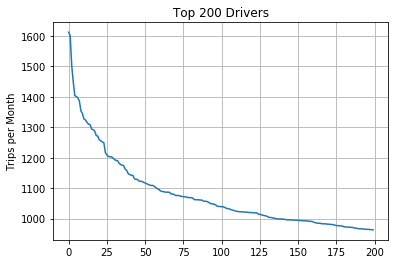

In [63]:
#ppl_earnings_a_month]
plt.plot(np.arange(0,200),ppl_trips_a_month)
plt.ylabel('Trips per Month')
plt.grid(True)
plt.title('Top 200 Drivers')

Text(0.5,1,'Top 200 Drivers')

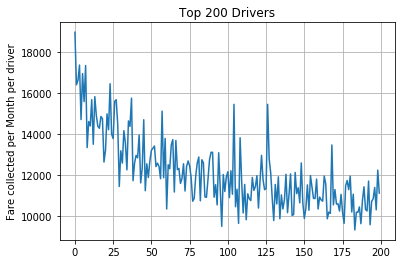

In [64]:
plt.plot(np.arange(0,200),ppl_earnings_a_month)
plt.ylabel('Fare collected per Month per driver')
plt.grid(True)
plt.title('Top 200 Drivers')

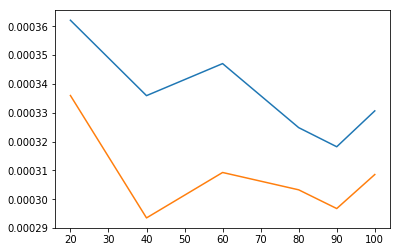